In [1]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from random import seed
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import backend as K
tf.compat.v1.experimental.output_all_intermediates(True)

In [2]:
tf.random.set_seed(36)

## Dataset

In [3]:
BASE_DIR_PATH = '../Datasets'
DATASET_FILE = os.path.join(BASE_DIR_PATH, '2016_2017_sto_nino_and_montalban_lag_12.csv')

In [4]:
df = pd.read_csv(DATASET_FILE)
df

,Unnamed: 0,month,day,hour,Station,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,...,Waterlevel_t-3,Waterlevel_t-4,Waterlevel_t-5,Waterlevel_t-6,Waterlevel_t-7,Waterlevel_t-8,Waterlevel_t-9,Waterlevel_t-10,Waterlevel_t-11,Waterlevel_t-12
0,0,1,1,0,Montalban,0,1,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1,0,Sto_Nino,0,1,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,1,1,Montalban,0,1,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,1,1,Sto_Nino,0,1,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,1,2,Montalban,1,1,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,35035,12,31,21,Sto_Nino,0,0,0,0,0,...,12.44,12.44,12.44,12.44,12.44,12.44,12.44,12.45,12.45,12.45
35036,35036,12,31,22,Montalban,0,0,0,0,0,...,21.18,21.18,21.18,21.18,21.18,21.18,21.18,21.18,21.18,21.18
35037,35037,12,31,22,Sto_Nino,0,0,0,0,0,...,12.44,12.44,12.44,12.44,12.44,12.44,12.44,12.44,12.45,12.45
35038,35038,12,31,23,Montalban,0,0,0,0,0,...,21.18,21.18,21.18,21.18,21.18,21.18,21.18,21.18,21.18,21.18


In [5]:
df = pd.get_dummies(df)
df

,Unnamed: 0,month,day,hour,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel,...,Waterlevel_t-5,Waterlevel_t-6,Waterlevel_t-7,Waterlevel_t-8,Waterlevel_t-9,Waterlevel_t-10,Waterlevel_t-11,Waterlevel_t-12,Station_Montalban,Station_Sto_Nino
0,0,1,1,0,0,1,2,0,0,21.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,1,1,1,0,0,1,2,0,0,12.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
2,2,1,1,1,0,1,1,1,0,21.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,3,1,1,1,0,1,1,1,0,12.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
4,4,1,1,2,1,1,1,0,1,21.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,35035,12,31,21,0,0,0,0,0,12.44,...,12.44,12.44,12.44,12.44,12.44,12.45,12.45,12.45,0,1
35036,35036,12,31,22,0,0,0,0,0,21.18,...,21.18,21.18,21.18,21.18,21.18,21.18,21.18,21.18,1,0
35037,35037,12,31,22,0,0,0,0,0,12.44,...,12.44,12.44,12.44,12.44,12.44,12.44,12.45,12.45,0,1
35038,35038,12,31,23,0,0,0,0,0,21.18,...,21.18,21.18,21.18,21.18,21.18,21.18,21.18,21.18,1,0


In [6]:
X_data = df.drop(columns=['Unnamed: 0', 'Waterlevel'])
X_data = X_data.values
y_data = df['Waterlevel']
y_data = y_data.values

In [7]:
np.set_printoptions(suppress=True)

In [8]:
X_data

array([[ 1.  ,  1.  ,  0.  , ...,   nan,  1.  ,  0.  ],
       [ 1.  ,  1.  ,  0.  , ...,   nan,  0.  ,  1.  ],
       [ 1.  ,  1.  ,  1.  , ...,   nan,  1.  ,  0.  ],
       ...,
       [12.  , 31.  , 22.  , ..., 12.45,  0.  ,  1.  ],
       [12.  , 31.  , 23.  , ..., 21.18,  1.  ,  0.  ],
       [12.  , 31.  , 23.  , ..., 12.45,  0.  ,  1.  ]])

In [9]:
y_data

array([21.03, 12.18, 21.03, ..., 12.44, 21.18, 12.44])

In [10]:
n = len(df)

In [11]:
X_train, y_train = X_data[:int(0.5*n)], y_data[:int(0.5*n)]
X_val, y_val = X_data[int(0.5*n):int(0.75*n)], y_data[int(0.5*n):int(0.75*n)]
X_test, y_test = X_data[int(0.75*n):], y_data[int(0.75*n):]

In [12]:
X_train.shape

(17520, 22)

In [13]:
X_train = X_train[~np.isnan(X_train).any(axis=1)]
X_train

array([[ 1.  ,  1.  , 12.  , ..., 21.03,  1.  ,  0.  ],
       [ 1.  ,  1.  , 12.  , ..., 12.18,  0.  ,  1.  ],
       [ 1.  ,  1.  , 13.  , ..., 21.03,  1.  ,  0.  ],
       ...,
       [12.  , 31.  , 22.  , ..., 12.53,  0.  ,  1.  ],
       [12.  , 31.  , 23.  , ..., 21.2 ,  1.  ,  0.  ],
       [12.  , 31.  , 23.  , ..., 12.53,  0.  ,  1.  ]])

In [14]:
X_train.shape

(17496, 22)

In [15]:
y_train = y_train[24:]
y_train.shape

(17496,)

In [16]:
X_val.shape

(8760, 22)

In [17]:
X_test.shape

(8760, 22)

## Evaluation Metrics

In [18]:
def r_square(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x, axis=0)
    my = K.mean(y, axis=0)
    xm, ym = x - mx, y - my
    r_num = K.square(K.sum(xm * ym))
    x_square_sum = K.sum(xm * xm)
    y_square_sum = K.sum(ym * ym)
    r_den = (x_square_sum * y_square_sum) + K.epsilon()
    
    r = r_num / r_den
    return r

In [19]:
def NSE(y_true, y_pred):
    '''
    This is the Nash-Sutcliffe Efficiency Coefficient
    '''
    y_pred = K.flatten(y_pred)
    y_true = K.flatten(y_true)

    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

## Models and Training Loops

In [20]:
def create_train_dnn_model(X_train, y_train, X_val, y_val, max_epochs=20, patience=2):
    # Create the model
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='linear')
    ])
    
    # Define early stopping callback
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=patience,
        mode='min',
        restore_best_weights=True
    )
    
    # Compile the model
    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.MeanSquaredError(), NSE, r_square]
    )
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=max_epochs,
        callbacks=[early_stopping]
    )
    
    return model, history

In [21]:
def create_train_cnn_model(X_train, y_train, X_val, y_val, max_epochs=20, patience=2):
    # Reshape input for 1D CNN
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
    
    conv_model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
        tf.keras.layers.Conv1D(filters=64, kernel_size=6, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=1)
    ])
    
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=patience,
        mode='min',
        restore_best_weights=True
    )
    
    conv_model.compile(
        optimizer='adam',
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.MeanSquaredError(), NSE, r_square]
    )
    
    conv_history = conv_model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=max_epochs,
        callbacks=[early_stopping]
    )
    
    return conv_model, conv_history

In [22]:
def create_train_lstm_model(X_train, y_train, X_val, y_val, max_epochs=20, patience=2):
    if len(X_train.shape) == 2:
        X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    if len(X_val.shape) == 2:
        X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
            
    lstm_model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
        tf.keras.layers.Flatten(),  # Add Flatten layer to handle dimension mismatch
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=1)
    ])
    
    # Define early stopping callback
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=patience,
        mode='min',
        restore_best_weights=True
    )
    
    # Compile the model
    lstm_model.compile(
        optimizer='adam',
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.MeanSquaredError(), NSE, r_square]
    )
    
    # Train the model
    lstm_history = lstm_model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=max_epochs,
        callbacks=[early_stopping]
    )
    
    return lstm_model, lstm_history

## Training

In [23]:
dnn_model, dnn_history = create_train_dnn_model(
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val
)

Epoch 1/20
547/547 [==============================] - 8s 7ms/step - loss: 2.2954 - mean_squared_error: 2.2954 - NSE: 0.8840 - r_square: 0.9866 - val_loss: 0.0308 - val_mean_squared_error: 0.0308 - val_NSE: 0.9985 - val_r_square: 0.9990
Epoch 2/20
547/547 [==============================] - 4s 7ms/step - loss: 0.0793 - mean_squared_error: 0.0793 - NSE: 0.9957 - r_square: 0.9964 - val_loss: 0.0129 - val_mean_squared_error: 0.0129 - val_NSE: 0.9994 - val_r_square: 0.9995
Epoch 3/20
547/547 [==============================] - 4s 7ms/step - loss: 0.0722 - mean_squared_error: 0.0722 - NSE: 0.9961 - r_square: 0.9968 - val_loss: 0.0122 - val_mean_squared_error: 0.0122 - val_NSE: 0.9994 - val_r_square: 0.9997
Epoch 4/20
547/547 [==============================] - 4s 7ms/step - loss: 0.0786 - mean_squared_error: 0.0786 - NSE: 0.9958 - r_square: 0.9967 - val_loss: 0.0087 - val_mean_squared_error: 0.0087 - val_NSE: 0.9996 - val_r_square: 0.9997
Epoch 5/20
547/547 [==============================] - 4s

In [24]:
cnn_model, cnn_history = create_train_cnn_model(
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val
)

Epoch 1/20
547/547 [==============================] - 8s 10ms/step - loss: 3.8261 - mean_squared_error: 3.8261 - NSE: 0.8056 - r_square: 0.9919 - val_loss: 0.0208 - val_mean_squared_error: 0.0208 - val_NSE: 0.9990 - val_r_square: 0.9994
Epoch 2/20
547/547 [==============================] - 4s 8ms/step - loss: 0.0651 - mean_squared_error: 0.0651 - NSE: 0.9965 - r_square: 0.9973 - val_loss: 0.0093 - val_mean_squared_error: 0.0093 - val_NSE: 0.9996 - val_r_square: 0.9996
Epoch 3/20
547/547 [==============================] - 5s 9ms/step - loss: 0.0582 - mean_squared_error: 0.0582 - NSE: 0.9969 - r_square: 0.9975 - val_loss: 0.0052 - val_mean_squared_error: 0.0052 - val_NSE: 0.9997 - val_r_square: 0.9998
Epoch 4/20
547/547 [==============================] - 4s 8ms/step - loss: 0.0613 - mean_squared_error: 0.0613 - NSE: 0.9967 - r_square: 0.9976 - val_loss: 0.0101 - val_mean_squared_error: 0.0101 - val_NSE: 0.9995 - val_r_square: 0.9998
Epoch 5/20
547/547 [==============================] - 5

In [25]:
# Train the model
lstm_model, lstm_history = create_train_lstm_model(
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val
)

Epoch 1/20
547/547 [==============================] - 11s 11ms/step - loss: 13.3936 - mean_squared_error: 13.3936 - NSE: 0.2967 - r_square: 0.8701 - val_loss: 0.1957 - val_mean_squared_error: 0.1957 - val_NSE: 0.9902 - val_r_square: 0.9971
Epoch 2/20
547/547 [==============================] - 5s 9ms/step - loss: 0.1922 - mean_squared_error: 0.1922 - NSE: 0.9898 - r_square: 0.9920 - val_loss: 0.0688 - val_mean_squared_error: 0.0688 - val_NSE: 0.9965 - val_r_square: 0.9988
Epoch 3/20
547/547 [==============================] - 6s 11ms/step - loss: 0.1545 - mean_squared_error: 0.1545 - NSE: 0.9918 - r_square: 0.9937 - val_loss: 0.0634 - val_mean_squared_error: 0.0634 - val_NSE: 0.9969 - val_r_square: 0.9985
Epoch 4/20
547/547 [==============================] - 6s 11ms/step - loss: 0.1443 - mean_squared_error: 0.1443 - NSE: 0.9924 - r_square: 0.9943 - val_loss: 0.0437 - val_mean_squared_error: 0.0437 - val_NSE: 0.9978 - val_r_square: 0.9992
Epoch 5/20
547/547 [==============================

## Predictions

In [26]:
X_test

array([[ 7.  ,  2.  , 12.  , ..., 21.06,  1.  ,  0.  ],
       [ 7.  ,  2.  , 12.  , ..., 12.16,  0.  ,  1.  ],
       [ 7.  ,  2.  , 13.  , ..., 21.07,  1.  ,  0.  ],
       ...,
       [12.  , 31.  , 22.  , ..., 12.45,  0.  ,  1.  ],
       [12.  , 31.  , 23.  , ..., 21.18,  1.  ,  0.  ],
       [12.  , 31.  , 23.  , ..., 12.45,  0.  ,  1.  ]])

In [27]:
X_test.shape

(8760, 22)

In [28]:
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
X_test_lstm

array([[[ 7.  ,  2.  , 12.  , ..., 21.06,  1.  ,  0.  ]],

       [[ 7.  ,  2.  , 12.  , ..., 12.16,  0.  ,  1.  ]],

       [[ 7.  ,  2.  , 13.  , ..., 21.07,  1.  ,  0.  ]],

       ...,

       [[12.  , 31.  , 22.  , ..., 12.45,  0.  ,  1.  ]],

       [[12.  , 31.  , 23.  , ..., 21.18,  1.  ,  0.  ]],

       [[12.  , 31.  , 23.  , ..., 12.45,  0.  ,  1.  ]]])

In [29]:
X_test_lstm.shape

(8760, 1, 22)

In [30]:
predictions = lstm_model(X_test_lstm)
predictions

<tf.Tensor: shape=(8760, 1), dtype=float32, numpy=
array([[21.221703],
       [12.055816],
       [21.224926],
       ...,
       [12.512793],
       [21.419407],
       [12.523505]], dtype=float32)>

In [31]:
predictions = np.array(predictions).reshape(-1)
predictions.shape

(8760,)

In [32]:
y_test, y_test.shape

(array([21.26, 11.89, 21.26, ..., 12.44, 21.18, 12.44]), (8760,))

In [33]:
sto_nino_test = y_test[1::2]
sto_nino_test

array([11.89, 11.87, 11.85, ..., 12.44, 12.44, 12.44])

In [34]:
sto_nino_pred = predictions[1::2]
sto_nino_pred

array([12.055816, 12.059369, 12.056479, ..., 12.502432, 12.512793,
       12.523505], dtype=float32)

In [35]:
SS_res = np.sum(np.square(sto_nino_test - sto_nino_pred)) 
SS_tot = np.sum(np.square(sto_nino_test - np.mean(sto_nino_test))) 

sto_nino_nse =  1 - SS_res/SS_tot
sto_nino_nse

0.7991341566963568

In [36]:
sto_nino_mse = np.mean(np.square(sto_nino_test-sto_nino_pred))
sto_nino_mse

0.062364641754256316

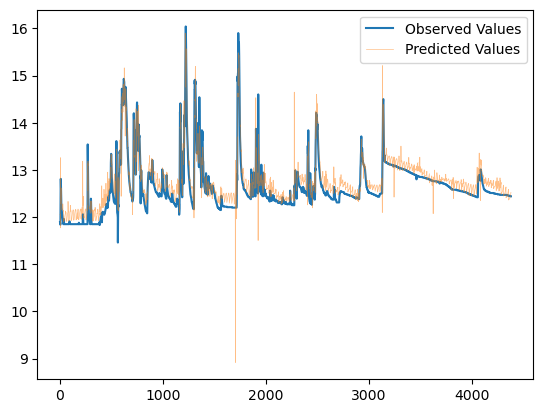

In [37]:
plt.plot(sto_nino_test, label='Observed Values')
plt.plot(sto_nino_pred, label='Predicted Values', alpha=0.5, linewidth=0.5)
plt.legend()
plt.show()

In [38]:
montalban_test = y_test[::2]
montalban_test

array([21.26, 21.26, 21.25, ..., 21.18, 21.18, 21.18])

In [39]:
montalban_pred = predictions[::2]
montalban_pred

array([21.221703, 21.224926, 21.233122, ..., 21.497795, 21.462833,
       21.419407], dtype=float32)

In [40]:
SS_res = np.sum(np.square(montalban_test - montalban_pred)) 
SS_tot = np.sum(np.square(montalban_test - np.mean(montalban_test))) 

montalban_nse =  1 - SS_res/SS_tot
montalban_nse

0.32234788519575774

In [41]:
montalban_mse = np.mean(np.square(montalban_test-montalban_pred))
montalban_mse

0.20606273536003286

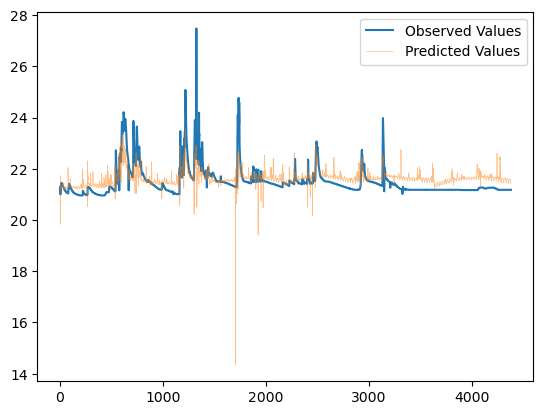

In [42]:
plt.plot(montalban_test, label='Observed Values')
plt.plot(montalban_pred, label='Predicted Values', alpha=0.5, linewidth=0.5)
plt.legend()
plt.show()

In [43]:
mse = (sto_nino_mse + montalban_mse)/2
nse = (sto_nino_nse + montalban_nse)/2

mse, nse

(0.13421368855714458, 0.5607410209460573)

In [44]:
np.savetxt('results/no_window_lag12_sto_nino.csv', sto_nino_pred, delimiter=',', fmt='%.4f')

In [45]:
np.savetxt('results/no_window_lag12_montalban.csv', montalban_pred, delimiter=',', fmt='%.4f')